# Import necessary modules/packages

In [1]:
import numpy as np
import pandas as pd
import pandasql as ps

# Questions that need to be answered

1. Write a SQL statement to count the number of orders per year and month.
2. Write a SQL statement to get top 20 product categories based on total revenue and total order (only for delivered orders).
3. Write a SQL statement to find the number of orders which are delivered late from the estimated time per year and month.
4. Write a SQL statement to find the top 3 customers per year and per month based on total spending.

# Dataset Schema

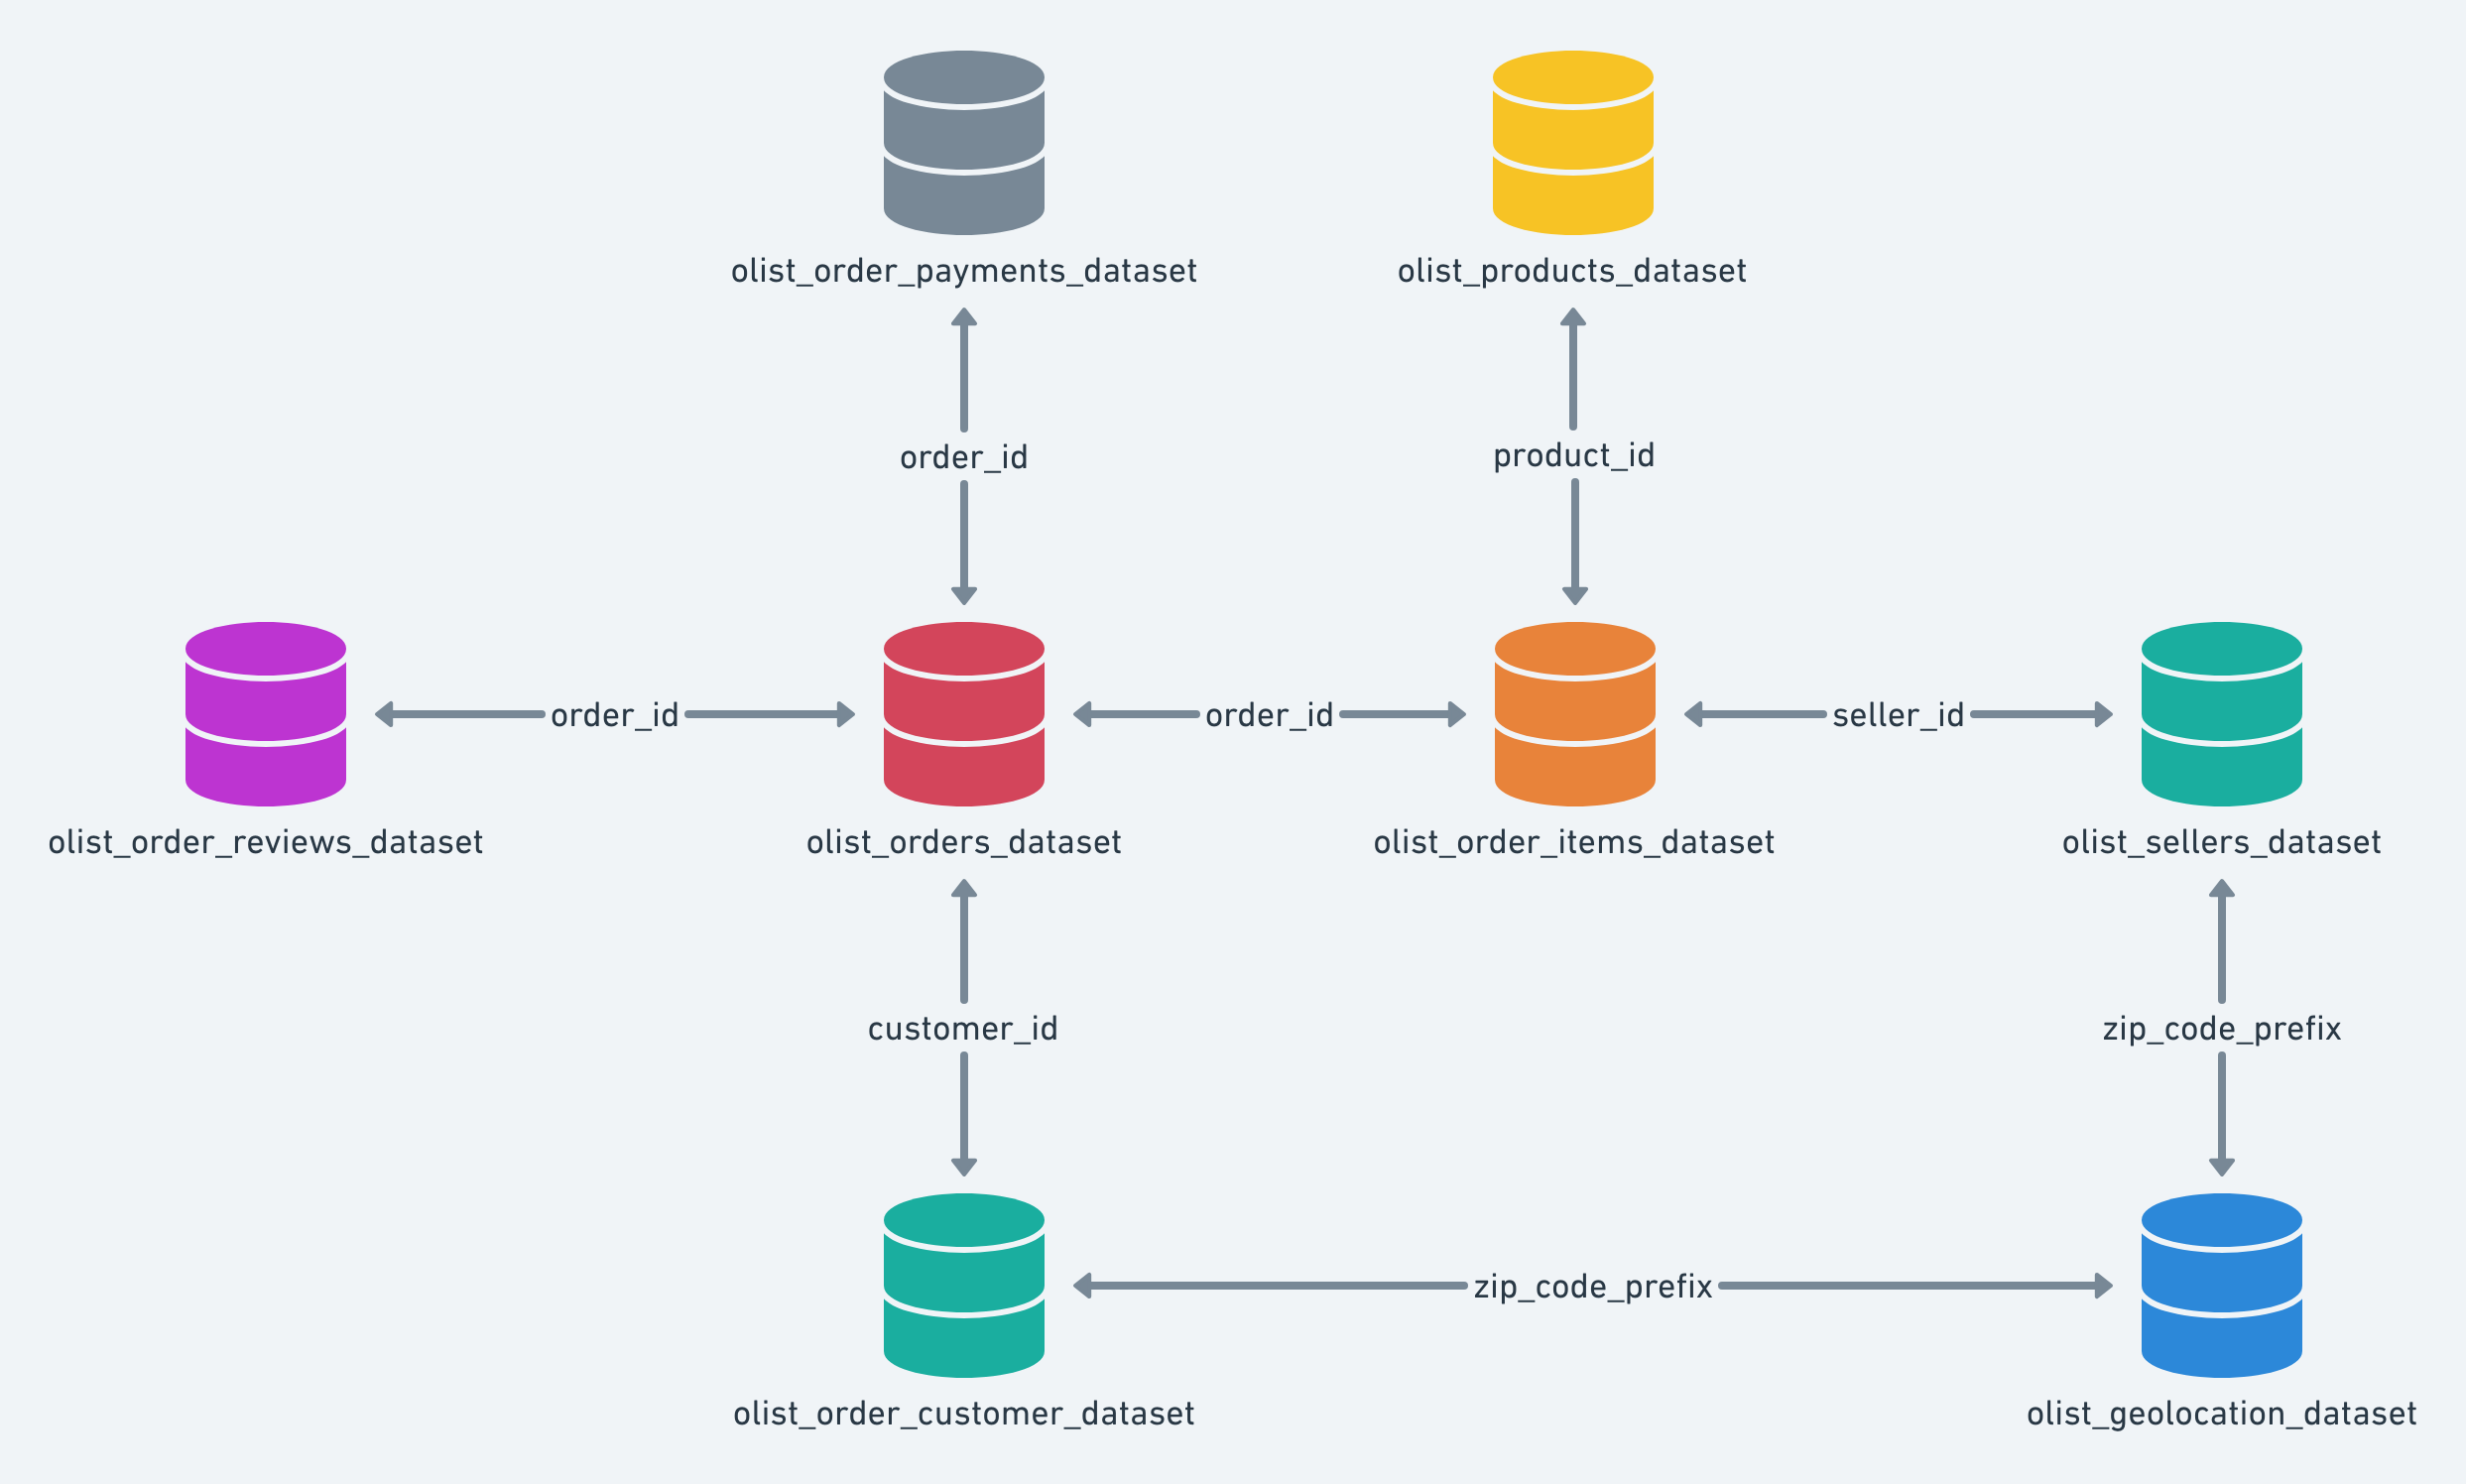

## 1st Question
### Write a SQL statement to count the number of orders per year and month.

In [2]:
# Import the dataset with the purchase date information
df_orders = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_orders_dataset.csv')

# Convert 'order_purchase_timestamp' to datetime because the dtype inside all columns are object
df_orders['order_purchase_timestamp'] = pd.to_datetime(df_orders['order_purchase_timestamp'])

# SQL query
query = """
    SELECT 
        strftime('%Y', order_purchase_timestamp) as purchase_year,
        strftime('%m', order_purchase_timestamp) as purchase_month,
        COUNT(*) as order_count
    FROM df_orders
    GROUP BY purchase_year, purchase_month
    ORDER BY purchase_year, purchase_month
"""

# Run the query
orders_count = ps.sqldf(query, locals())

# Display the result
print(orders_count)

   purchase_year purchase_month  order_count
0           2016             09            4
1           2016             10          324
2           2016             12            1
3           2017             01          800
4           2017             02         1780
5           2017             03         2682
6           2017             04         2404
7           2017             05         3700
8           2017             06         3245
9           2017             07         4026
10          2017             08         4331
11          2017             09         4285
12          2017             10         4631
13          2017             11         7544
14          2017             12         5673
15          2018             01         7269
16          2018             02         6728
17          2018             03         7211
18          2018             04         6939
19          2018             05         6873
20          2018             06         6167
21        

#### Using Python only

In [3]:
df_orders = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_orders_dataset.csv')
df_orders.head()
df_orders['order_purchase_timestamp'] = pd.to_datetime(df_orders['order_purchase_timestamp'])
df_orders['purchase_year'] = df_orders['order_purchase_timestamp'].dt.year
df_orders['purchase_month'] = df_orders['order_purchase_timestamp'].dt.month
orders_count = df_orders.groupby(['purchase_year', 'purchase_month']).size().reset_index(name='order_count')
print(orders_count)

    purchase_year  purchase_month  order_count
0            2016               9            4
1            2016              10          324
2            2016              12            1
3            2017               1          800
4            2017               2         1780
5            2017               3         2682
6            2017               4         2404
7            2017               5         3700
8            2017               6         3245
9            2017               7         4026
10           2017               8         4331
11           2017               9         4285
12           2017              10         4631
13           2017              11         7544
14           2017              12         5673
15           2018               1         7269
16           2018               2         6728
17           2018               3         7211
18           2018               4         6939
19           2018               5         6873
20           

## 2nd Question
### Write a SQL statement to get top 20 product categories based on total revenue and total order (only for delivered orders).

In [4]:
# Import the datasets
df_orders = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_orders_dataset.csv')
df_items = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_order_items_dataset.csv')
df_products = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_products_dataset.csv')

# Filter to delivered order only 
df_orders = df_orders[df_orders['order_status'] == 'delivered']
df_orders.reset_index(drop=True, inplace=True)

# Merge the DataFrames
query = """
    SELECT 
        product_category_name,
        COUNT(*) as category_count
    FROM df_orders
    LEFT JOIN df_items ON df_orders.order_id = df_items.order_id
    LEFT JOIN df_products ON df_items.product_id = df_products.product_id
    GROUP BY product_category_name
    ORDER BY category_count DESC
    LIMIT 20
"""

# Run the query
result = ps.sqldf(query, locals())

# Display the result
print(result)

          product_category_name  category_count
0               cama_mesa_banho           10953
1                  beleza_saude            9465
2                 esporte_lazer            8431
3              moveis_decoracao            8160
4        informatica_acessorios            7644
5         utilidades_domesticas            6795
6            relogios_presentes            5859
7                     telefonia            4430
8            ferramentas_jardim            4268
9                    automotivo            4140
10                   brinquedos            4030
11                   cool_stuff            3718
12                   perfumaria            3340
13                        bebes            2982
14                  eletronicos            2729
15                    papelaria            2466
16  fashion_bolsas_e_acessorios            1985
17                     pet_shop            1924
18            moveis_escritorio            1668
19                         None         

In [5]:
# Load datasets
df_orders = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_orders_dataset.csv')
df_items = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_order_items_dataset.csv')
df_products = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_products_dataset.csv')
df_payments = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_order_payments_dataset.csv')

# Filter to delivered orders only
df_orders = df_orders[df_orders['order_status'] == 'delivered']

# Merge the datasets accordingly
df_merge = pd.merge(df_orders, df_items, on='order_id', how='left')
df_merge = pd.merge(df_merge, df_products, on='product_id', how='left')
df_merge = pd.merge(df_merge, df_payments, on='order_id', how='left')

# Calculate revenue by category using SQL-like query
query = '''
    SELECT 
        product_category_name, 
        SUM(payment_value) as total_revenue 
    FROM df_merge 
    GROUP BY product_category_name 
    ORDER BY total_revenue DESC 
    LIMIT 20
'''
revenue_by_category = ps.sqldf(query, locals())
print(revenue_by_category)


     product_category_name  total_revenue
0          cama_mesa_banho     1692714.28
1             beleza_saude     1620684.04
2   informatica_acessorios     1549372.59
3         moveis_decoracao     1394466.93
4       relogios_presentes     1387362.45
5            esporte_lazer     1349446.93
6    utilidades_domesticas     1069787.97
7               automotivo      833745.67
8       ferramentas_jardim      810614.93
9               cool_stuff      744649.32
10       moveis_escritorio      636124.88
11              brinquedos      603564.32
12                   bebes      525553.22
13              perfumaria      496263.60
14               telefonia      469890.57
15               papelaria      308674.31
16                pet_shop      307716.36
17                     pcs      274671.88
18             eletronicos      245869.53
19                    None      240995.88


#### Using Python Only

In [6]:
# Import the datasets
df_orders = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_orders_dataset.csv')
df_items = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_order_items_dataset.csv')
df_products = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_products_dataset.csv')

# Filter to delivered order only
df_orders = df_orders[df_orders['order_status'] == 'delivered']
df_orders.reset_index(drop=True, inplace=True)

# Merge the dataset accordingly
df_merge = df_orders.merge(df_items, on='order_id', how='left')
df_merge = df_merge.merge(df_products, on='product_id', how='left')

value_counts = df_merge['product_category_name'].value_counts()
with pd.option_context('display.max_rows', None):
    print(value_counts.head(20))

product_category_name
cama_mesa_banho                10953
beleza_saude                    9465
esporte_lazer                   8431
moveis_decoracao                8160
informatica_acessorios          7644
utilidades_domesticas           6795
relogios_presentes              5859
telefonia                       4430
ferramentas_jardim              4268
automotivo                      4140
brinquedos                      4030
cool_stuff                      3718
perfumaria                      3340
bebes                           2982
eletronicos                     2729
papelaria                       2466
fashion_bolsas_e_acessorios     1985
pet_shop                        1924
moveis_escritorio               1668
consoles_games                  1089
Name: count, dtype: int64


In [7]:
# Import the datasets
df_orders = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_orders_dataset.csv')
df_items = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_order_items_dataset.csv')
df_products = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_products_dataset.csv')
df_payments = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_order_payments_dataset.csv')

# Filter to delivered order only
df_orders = df_orders[df_orders['order_status'] == 'delivered']
df_orders.reset_index(drop=True, inplace=True)

# Merge the dataset accordingly
df_merge = df_orders.merge(df_items, on='order_id', how='left')
df_merge = df_merge.merge(df_products, on='product_id', how='left')
df_merge = df_merge.merge(df_payments, on='order_id', how='left')

revenue_by_category = df_merge.groupby('product_category_name')['payment_value'].sum().reset_index()
revenue_by_category = revenue_by_category.sort_values(by=['payment_value'], ascending=False)
revenue_by_category.reset_index(drop=True, inplace=True)
with pd.option_context('display.max_rows', None):
    print(revenue_by_category.head(20))

                product_category_name  payment_value
0                     cama_mesa_banho     1692714.28
1                        beleza_saude     1620684.04
2              informatica_acessorios     1549372.59
3                    moveis_decoracao     1394466.93
4                  relogios_presentes     1387362.45
5                       esporte_lazer     1349446.93
6               utilidades_domesticas     1069787.97
7                          automotivo      833745.67
8                  ferramentas_jardim      810614.93
9                          cool_stuff      744649.32
10                  moveis_escritorio      636124.88
11                         brinquedos      603564.32
12                              bebes      525553.22
13                         perfumaria      496263.60
14                          telefonia      469890.57
15                          papelaria      308674.31
16                           pet_shop      307716.36
17                                pcs      274

## 3rd Question
### Write a SQL statement to find the number of orders which are delivered late from the estimated time per year and month.

In [8]:
# Load the dataset
df_orders = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_orders_dataset.csv')

# SQL query to count the late deliveries
query = """
SELECT 
    strftime('%Y', order_delivered_customer_date) AS delivered_year, 
    strftime('%m', order_delivered_customer_date) AS delivered_month, 
    COUNT(*) AS delivery_late
FROM 
    df_orders
WHERE 
    order_delivered_customer_date IS NOT NULL 
    AND order_estimated_delivery_date IS NOT NULL 
    AND order_delivered_customer_date > order_estimated_delivery_date 
GROUP BY 
    delivered_year, delivered_month;
"""

# Run the SQL query using pandasql
pysqldf = lambda q: ps.sqldf(q, globals())
late_delivered = pysqldf(query)
print(late_delivered)

   delivered_year delivered_month  delivery_late
0            2016              11              2
1            2016              12              2
2            2017              02              2
3            2017              03             64
4            2017              04            103
5            2017              05            226
6            2017              06            114
7            2017              07            117
8            2017              08            119
9            2017              09            175
10           2017              10            219
11           2017              11            243
12           2017              12            765
13           2018              01            667
14           2018              02            384
15           2018              03           1081
16           2018              04           1462
17           2018              05            470
18           2018              06            577
19           2018   

#### Using Python Only

In [9]:
# Load the datasets
df_orders = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_orders_dataset.csv')

# Drop the rows with null value on order_delivered_customer_date (order not delivered yet) 
df_orders = df_orders.dropna(subset=['order_delivered_customer_date'])
df_orders['order_delivered_customer_date'] = pd.to_datetime(df_orders['order_delivered_customer_date']) 
df_orders['order_estimated_delivery_date'] = pd.to_datetime(df_orders['order_estimated_delivery_date']) 

# Change the dtypes from object to datetime
df_orders['delivered_year'] = df_orders['order_delivered_customer_date'].dt.year
df_orders['delivered_month'] = df_orders['order_delivered_customer_date'].dt.month

# Check which order is late
df_orders['delivery_late'] = df_orders['order_delivered_customer_date'] > df_orders['order_estimated_delivery_date']

# Group by each month of the year
late_delivery = df_orders[df_orders['delivery_late'] == True].groupby(['delivered_year', 'delivered_month'])['delivery_late'].value_counts()

# Convert 'delivery_late' column to numeric (0 and 1)
df_orders['delivery_late'] = df_orders['delivery_late'].astype(int)

# Filter out the True values
late_delivered = df_orders[df_orders['delivery_late'] == 1].groupby(['delivered_year', 'delivered_month'])['delivery_late'].sum().reset_index()
late_delivered.reset_index(drop=True, inplace=True)
late_delivered

,delivered_year,delivered_month,delivery_late
0,2016,11,2
1,2016,12,2
2,2017,2,2
3,2017,3,64
4,2017,4,103
5,2017,5,226
6,2017,6,114
7,2017,7,117
8,2017,8,119
9,2017,9,175


## 4th Question
### Write a SQL statement to find the top 3 customers per year and per month based on total spending.

In [10]:
# Load the datasets
df_orders = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_orders_dataset.csv')
df_payments = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_order_payments_dataset.csv')
df_customers = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_customers_dataset.csv')

# Merge the datasets
df_merge = df_orders.merge(df_payments, on='order_id', how='left')
df_merge = df_merge.merge(df_customers, on='customer_id', how='left')

# Define the SQL query
query = """
    SELECT 
        customer_unique_id,
        strftime('%Y', order_purchase_timestamp) AS purchase_year,
        strftime('%m', order_purchase_timestamp) AS purchase_month,
        SUM(payment_value) AS total_spending
    FROM df_merge
    GROUP BY customer_unique_id, purchase_year, purchase_month
    ORDER BY purchase_year, purchase_month, total_spending DESC
"""

# Execute the SQL query using pandasql
result = ps.sqldf(query, locals())

# Find the top 3 customers for each month in each year
top_3_customers = result.groupby(['purchase_year', 'purchase_month']).head(3)

# Display the top 3 customers for each month in each year
with pd.option_context('display.max_rows', None):
    print(top_3_customers)

                     customer_unique_id purchase_year purchase_month  \
0      b7d76e111c89f7ebf14761390f0f7d17          2016             09   
1      4854e9b3feff728c13ee5fc7d1547e92          2016             09   
2      009b0127b727ab0ba422f6d9604487c7          2016             09   
4      fdaa290acb9eeacb66fa7f979baa6803          2016             10   
5      753bc5d6efa9e49a03e34cf521a9e124          2016             10   
6      b92a2e5e8a6eabcc80882c7d68b2c70b          2016             10   
325    f7b981e8a280e455ac3cbe0d5d171bd1          2016             12   
326    ee2bb06c1d3f368e92084edefb7e4b57          2017             01   
327    bd8717655febcdf30f106e9f3cb24628          2017             01   
328    7c82b91749355c6daebaada73da54e2e          2017             01   
1091   dc4802a71eae9be1dd28f5d788ceb526          2017             02   
1092   5e713be0853d8986528d7869a0811d2b          2017             02   
1093   5d09b0d82126457e2a8ebfb9c9a1ffc4          2017           

#### Using Python only

In [11]:
# Loed the datasets
df_orders = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_orders_dataset.csv')
df_payments = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_order_payments_dataset.csv')
df_customers = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_customers_dataset.csv') 

df_merge = df_orders.merge(df_payments, on='order_id', how='left') 
df_merge = df_merge.merge(df_customers, on='customer_id', how='left') 

df_merge['order_purchase_timestamp'] = pd.to_datetime(df_merge['order_purchase_timestamp']) 
df_merge['purchase_year'] = df_merge['order_purchase_timestamp'].dt.year
df_merge['purchase_month'] = df_merge['order_purchase_timestamp'].dt.month

total_spending = df_merge.groupby(['customer_unique_id', 'purchase_year', 'purchase_month'])['payment_value'].sum().reset_index() 
total_spending = total_spending.sort_values(['purchase_year', 'purchase_month', 'payment_value'], ascending=[True, True, False])

top_3_customers = total_spending.groupby(['purchase_year', 'purchase_month']).head(3)

with pd.option_context('display.max_rows', None):
    print(top_3_customers)

                     customer_unique_id  purchase_year  purchase_month  \
70504  b7d76e111c89f7ebf14761390f0f7d17           2016               9   
27787  4854e9b3feff728c13ee5fc7d1547e92           2016               9   
242    009b0127b727ab0ba422f6d9604487c7           2016               9   
97142  fdaa290acb9eeacb66fa7f979baa6803           2016              10   
44986  753bc5d6efa9e49a03e34cf521a9e124           2016              10   
71034  b92a2e5e8a6eabcc80882c7d68b2c70b           2016              10   
94936  f7b981e8a280e455ac3cbe0d5d171bd1           2016              12   
91334  ee2bb06c1d3f368e92084edefb7e4b57           2017               1   
72691  bd8717655febcdf30f106e9f3cb24628           2017               1   
47797  7c82b91749355c6daebaada73da54e2e           2017               1   
84490  dc4802a71eae9be1dd28f5d788ceb526           2017               2   
36284  5e713be0853d8986528d7869a0811d2b           2017               2   
35762  5d09b0d82126457e2a8ebfb9c9a1ffc